## Simple Linear Regression

## Salary Data           
## Building a prediction for Salary hike

In [1]:
#import Data_Set
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("D:\\assignment\\simple_linear_regression\\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


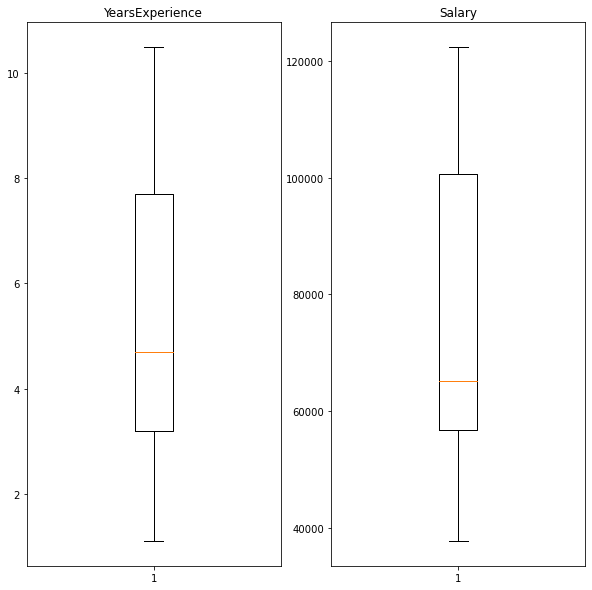

In [4]:
#check for outliers
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
plt.subplot(1,2,1)
plt.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(1,2,2)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Density'>

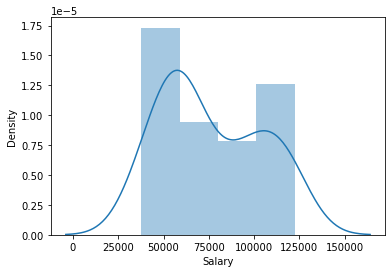

In [5]:
import seaborn as sns
sns.distplot(df["Salary"])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

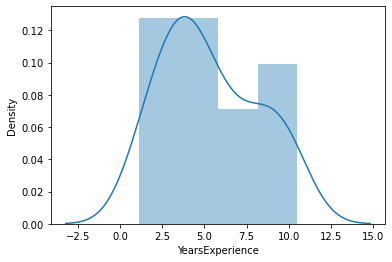

In [6]:
sns.distplot(df["YearsExperience"])

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
y=df['Salary'].values
x=df['YearsExperience'].values

In [10]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [11]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

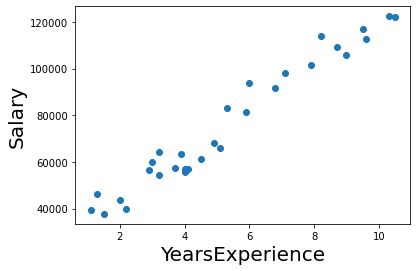

In [12]:
plt.scatter(x,y)
plt.xlabel("YearsExperience",fontsize=20)
plt.ylabel("Salary",fontsize=20)
plt.show()

In [13]:
#correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
#Fitting linear Regression model
import statsmodels.formula.api as smf
df=smf.ols("Salary~YearsExperience",data = df).fit()

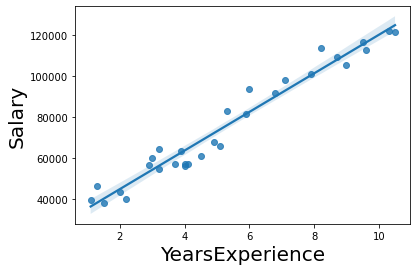

In [15]:
sns.regplot(x,y)
plt.xlabel("YearsExperience",fontsize=20)
plt.ylabel("Salary",fontsize=20)
plt.show()

In [16]:
print(df.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        12:32:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

In [17]:
#p-value
print(df.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [18]:
#t-value
print(df.tvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64


In [19]:
#accuracy
(df.rsquared,df.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [20]:
#coefficient
df.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

[ 37821.3825399  42979.8225797  48138.2626195  61034.362719
  66192.8027588  84247.3428981  86826.562918   91985.0029578
  91985.0029578 104881.1030573 110039.5430971 112618.763117
 112618.763117  115197.9831369 125514.8632165 135831.7432961
 140990.1833359 146148.6233757 161623.9434951 164203.163515
 184836.9236742 192574.5837339 213208.3438931 220946.0039528
 233842.1040523 241579.764112  254475.8642115 257055.0842314
 275109.6243707 280268.0644105]


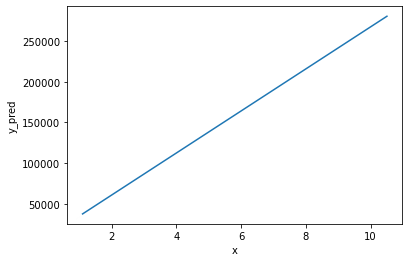

In [21]:
y_pred=9449.962321+25792.200199*x
print(y_pred)
fig=plt.plot(x,y_pred,label="regression line")
plt.xlabel("x")
plt.ylabel("y_pred")
plt.show()

In [22]:
#to check the fitted values
df.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [23]:
#generating residual values
#actual value - predicted values
df.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

0    20000
1    25000
2    30000
3    40000
dtype: int64 0    5.158535e+08
1    6.448145e+08
2    7.737755e+08
3    1.031697e+09
dtype: float64


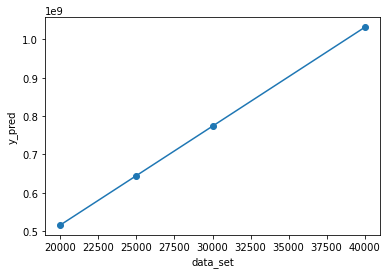

In [24]:
#predicting for new data points
x1=pd.Series([20000,25000,30000,40000])
x1

y_pred=9449.962321+25792.200199*x1
y_pred


fig=plt.plot(x1,y_pred,label="regression line")
print(x1,y_pred)
plt.xlabel("data_set")
plt.ylabel("y_pred")
plt.scatter(x1,y_pred)

## TRANSFORMATIONS

## Square_root_Transformations

In [25]:
Salary_SQRT = np.sqrt(y)
Salary_SQRT

array([198.35069952, 214.95348334, 194.24469105, 208.62646045,
       199.72731411, 237.99579828, 245.25496937, 233.33452381,
       253.86019775, 239.1422171 , 251.43189933, 236.20753587,
       238.65665715, 238.91630334, 247.2063915 , 260.64918952,
       256.96108655, 288.24989159, 285.24200252, 306.4963295 ,
       302.88281562, 313.48524686, 318.27975116, 337.36034147,
       330.80356709, 324.93383942, 342.00730986, 335.61138241,
       349.84425106, 349.10170438])

In [26]:
YearsExperience_SQRT = np.sqrt(x)
YearsExperience_SQRT

array([1.04880885, 1.14017543, 1.22474487, 1.41421356, 1.4832397 ,
       1.70293864, 1.73205081, 1.78885438, 1.78885438, 1.92353841,
       1.97484177, 2.        , 2.        , 2.02484567, 2.12132034,
       2.21359436, 2.25831796, 2.30217289, 2.42899156, 2.44948974,
       2.60768096, 2.66458252, 2.81069386, 2.86356421, 2.94957624,
       3.        , 3.082207  , 3.09838668, 3.20936131, 3.24037035])

In [27]:
SalarySQRT=pd.DataFrame(Salary_SQRT)
Salary_SQRT

array([198.35069952, 214.95348334, 194.24469105, 208.62646045,
       199.72731411, 237.99579828, 245.25496937, 233.33452381,
       253.86019775, 239.1422171 , 251.43189933, 236.20753587,
       238.65665715, 238.91630334, 247.2063915 , 260.64918952,
       256.96108655, 288.24989159, 285.24200252, 306.4963295 ,
       302.88281562, 313.48524686, 318.27975116, 337.36034147,
       330.80356709, 324.93383942, 342.00730986, 335.61138241,
       349.84425106, 349.10170438])

In [28]:
YearsExperience_SQRT=pd.DataFrame(YearsExperience_SQRT)
YearsExperience_SQRT

,0
0,1.048809
1,1.140175
2,1.224745
3,1.414214
4,1.483240
5,1.702939
6,1.732051
7,1.788854
8,1.788854
9,1.923538


In [30]:
model_sqrt= smf.ols('Salary_SQRT~YearsExperience_SQRT',data = df).fit()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\compat.py", line 36, in call_and_wrap_exc
    return f(*args, **kwargs)
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 165, in eval
    return eval(code, {}, VarLookupDict([inner_namespace]
  File "<string>", line 1, in <module>
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
TypeError: 'RegressionResultsWrapper' object is not subscriptable

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\rajpu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rajpu\AppData\Local\Temp\ipykernel_3564\2155358037.py", line 1, in <cell line: 1>
  

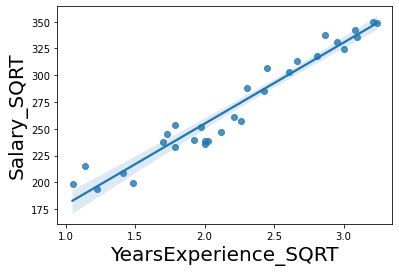

In [31]:
sns.regplot(YearsExperience_SQRT,Salary_SQRT)
plt.xlabel("YearsExperience_SQRT",fontsize=20)
plt.ylabel("Salary_SQRT",fontsize=20)
plt.show()

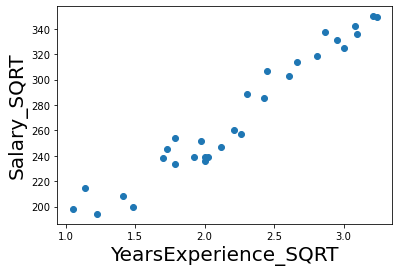

In [32]:
plt.scatter(YearsExperience_SQRT,Salary_SQRT)
plt.xlabel("YearsExperience_SQRT",fontsize=20)
plt.ylabel("Salary_SQRT",fontsize=20)
plt.show()

## Cube_root_transformation

In [33]:
Salary_CBRT = np.cbrt(y)
Salary_CBRT

array([34.01124196, 35.88362627, 33.54023531, 35.17598439, 34.16842611,
       38.40427108, 39.18127316, 37.90117442, 40.09249429, 38.52750045,
       39.83641525, 38.21165365, 38.47533136, 38.50323243, 39.38883448,
       40.80414222, 40.41831833, 43.63611742, 43.33202494, 45.45868326,
       45.10067993, 46.14713442, 46.61646529, 48.46140693, 47.83144002,
       47.26394426, 48.90541242, 48.2937713 , 49.64968465, 49.57940525])

In [34]:
YearsExperience_CBRT = np.cbrt(x)
YearsExperience_CBRT

array([1.03228012, 1.09139288, 1.14471424, 1.25992105, 1.30059145,
       1.42604315, 1.44224957, 1.4736126 , 1.4736126 , 1.54668037,
       1.57406092, 1.58740105, 1.58740105, 1.60052066, 1.65096362,
       1.69849925, 1.72130062, 1.7435134 , 1.80696887, 1.81712059,
       1.89453647, 1.92199734, 1.9916317 , 2.01652968, 2.05671012,
       2.08008382, 2.11791179, 2.12531714, 2.17576711, 2.18975957])

In [35]:
YearsExperience_CBRT=pd.DataFrame(YearsExperience_CBRT)
YearsExperience_CBRT

,0
0,1.032280
1,1.091393
2,1.144714
3,1.259921
4,1.300591
5,1.426043
6,1.442250
7,1.473613
8,1.473613
9,1.546680


In [36]:
Salary_CBRT=pd.DataFrame(Salary_CBRT)
Salary_CBRT

,0
0,34.011242
1,35.883626
2,33.540235
3,35.175984
4,34.168426
5,38.404271
6,39.181273
7,37.901174
8,40.092494
9,38.527500


In [37]:
model_cbrt = smf.ols('Salary_CBRT~YearsExperience_CBRT', data = df).fit()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\compat.py", line 36, in call_and_wrap_exc
    return f(*args, **kwargs)
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 165, in eval
    return eval(code, {}, VarLookupDict([inner_namespace]
  File "<string>", line 1, in <module>
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
TypeError: 'RegressionResultsWrapper' object is not subscriptable

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\rajpu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rajpu\AppData\Local\Temp\ipykernel_3564\3806463463.py", line 1, in <cell line: 1>
  

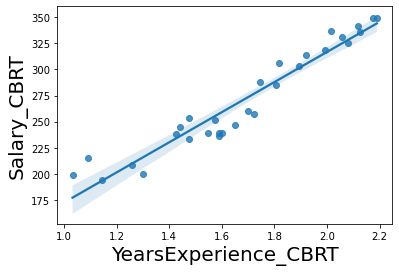

In [38]:
sns.regplot(YearsExperience_CBRT,Salary_SQRT)
plt.xlabel("YearsExperience_CBRT",fontsize=20)
plt.ylabel("Salary_CBRT",fontsize=20)
plt.show()

## Log_Transformation

In [39]:
Salary_Log= np.log(x)
Salary_Log

array([0.09531018, 0.26236426, 0.40546511, 0.69314718, 0.78845736,
       1.06471074, 1.09861229, 1.16315081, 1.16315081, 1.30833282,
       1.36097655, 1.38629436, 1.38629436, 1.41098697, 1.5040774 ,
       1.58923521, 1.62924054, 1.66770682, 1.77495235, 1.79175947,
       1.91692261, 1.96009478, 2.06686276, 2.10413415, 2.16332303,
       2.19722458, 2.2512918 , 2.2617631 , 2.3321439 , 2.35137526])

In [40]:
YearsExperience_Log= np.log(y)
YearsExperience_Log

array([10.58007335, 10.7408433 , 10.53823732, 10.68109076, 10.59390601,
       10.94450604, 11.00459672, 10.9049463 , 11.07356743, 10.95411685,
       11.05434435, 10.92942162, 10.95005188, 10.95222659, 11.02044716,
       11.1263508 , 11.09784932, 11.32765557, 11.3066759 , 11.45041156,
       11.42669197, 11.4955046 , 11.52586143, 11.64230324, 11.60304949,
       11.56724318, 11.66966422, 11.63190778, 11.71497612, 11.71072659])

In [41]:
YearsExperience_Log=pd.DataFrame(YearsExperience_Log)
YearsExperience_Log

,0
0,10.580073
1,10.740843
2,10.538237
3,10.681091
4,10.593906
5,10.944506
6,11.004597
7,10.904946
8,11.073567
9,10.954117


In [42]:
Salary_Log=pd.DataFrame(Salary_Log)
Salary_Log

,0
0,0.095310
1,0.262364
2,0.405465
3,0.693147
4,0.788457
5,1.064711
6,1.098612
7,1.163151
8,1.163151
9,1.308333


In [43]:
model_LOG= smf.ols('Salary_Log~YearsExperience_Log',data = df).fit()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\compat.py", line 36, in call_and_wrap_exc
    return f(*args, **kwargs)
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 165, in eval
    return eval(code, {}, VarLookupDict([inner_namespace]
  File "<string>", line 1, in <module>
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
  File "C:\Users\rajpu\anaconda3\lib\site-packages\patsy\eval.py", line 48, in __getitem__
    return d[key]
TypeError: 'RegressionResultsWrapper' object is not subscriptable

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\rajpu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rajpu\AppData\Local\Temp\ipykernel_3564\3202524810.py", line 1, in <cell line: 1>
  

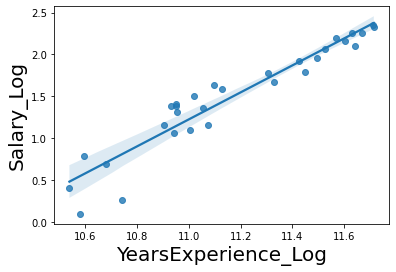

In [44]:
sns.regplot(YearsExperience_Log,Salary_Log)
plt.xlabel("YearsExperience_Log",fontsize=20)
plt.ylabel("Salary_Log",fontsize=20)
plt.show()